In [1]:
import os, warnings
print(os.getcwd())
warnings.filterwarnings('ignore')

D:\Sem8\Stock prediction


[*********************100%***********************]  1 of 1 completed


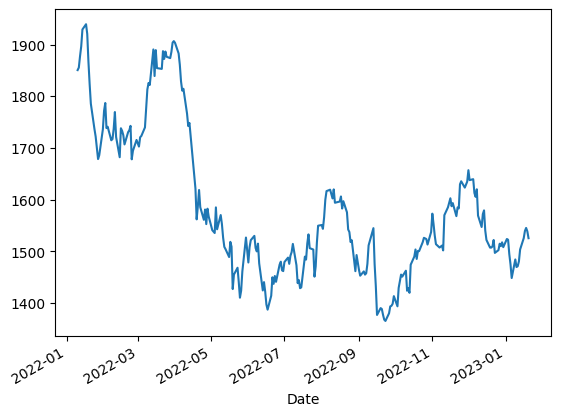

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-16,1510.000000,1528.000000,1502.300049,1525.500000,1525.500000,6073063
2023-01-17,1527.000000,1542.199951,1524.000000,1539.500000,1539.500000,5922644
2023-01-18,1544.750000,1551.849976,1539.599976,1545.400024,1545.400024,5843098
2023-01-19,1539.900024,1549.550049,1526.150024,1538.900024,1538.900024,6165284
2023-01-20,1538.000000,1545.000000,1524.000000,1525.550049,1525.550049,6496429


In [67]:
import yfinance as yf   
 
data1 = yf.download('INFY.NS','2022-01-10','2023-01-21') 
 
# Plot the close prices 
import matplotlib.pyplot as plt 
data1.Close.plot() 
plt.show() 

data1.tail()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.seasonal import seasonal_decompose


data = pd.read_csv('INFY1.csv')
data.head(10)

# data = data1
data

,ticker,date,open,high,low,close,adj close,volume
0,INFY.NS,2023-01-11,1470.0,1494.00,1464.00,1471.25,1471.25,6171143
1,INFY.NS,2023-01-10,1482.0,1483.90,1455.90,1469.75,1469.75,7157440
2,INFY.NS,2023-01-09,1448.2,1489.35,1448.20,1484.45,1484.45,11497627
3,INFY.NS,2023-01-06,1470.0,1475.00,1446.50,1448.50,1448.50,6440488
4,INFY.NS,2023-01-05,1505.9,1505.90,1469.25,1475.20,1475.20,9866513
...,...,...,...,...,...,...,...,...
271,INFY.NS,2021-12-07,1701.1,1724.90,1694.00,1711.65,1711.65,4202122
272,INFY.NS,2021-12-06,1730.0,1733.95,1691.50,1695.30,1695.30,3989940
273,INFY.NS,2021-12-03,1771.1,1786.65,1732.55,1735.55,1735.55,6753626
274,INFY.NS,2021-12-02,1715.0,1750.50,1711.35,1748.25,1748.25,5558673


In [3]:
# data cleaning
InfyData = data.dropna()

InfyData.index = pd.to_datetime(InfyData.date)
InfyData = InfyData["close"]['2022-01-10':'2023-01-10']
InfyData.sort_index(inplace= True)
InfyData.describe()

count     247.000000
mean     1585.615182
std       144.445218
min      1365.450000
25%      1478.975000
50%      1541.000000
75%      1684.200000
max      1939.500000
Name: close, dtype: float64

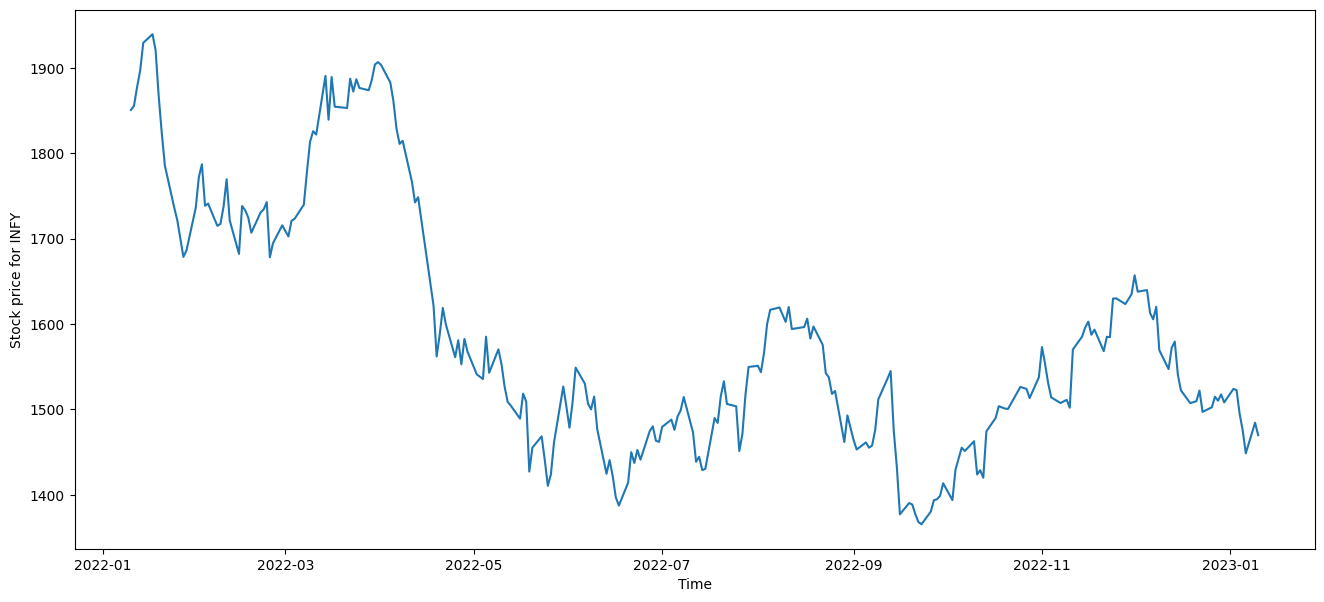

In [4]:
# Data plot

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time')
ax1.set_ylabel('Stock price for INFY')
ax1.plot(InfyData)


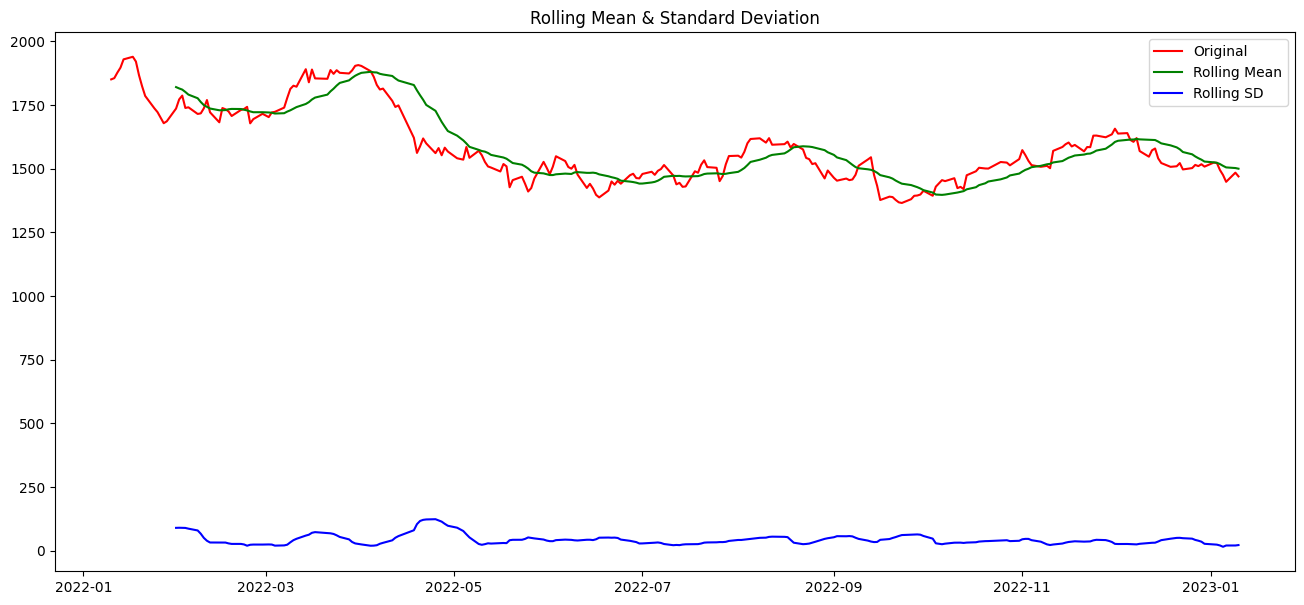

In [5]:
# Stationarity check

rollingMean = InfyData.rolling(15).mean()
rollingSD = InfyData.rolling(15).std()
plt.figure(figsize=(16,7))
fig = plt.figure(1) 
ori = plt.plot(InfyData, color='red', label='Original')
mean = plt.plot(rollingMean, color='green', label='Rolling Mean')
std = plt.plot(rollingSD, color='blue', label = 'Rolling SD')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

<AxesSubplot: xlabel='date'>

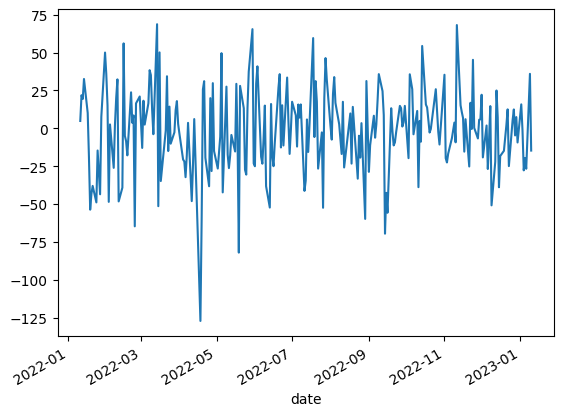

In [6]:
# make stationary : Seasonal differencing

InfyStockDF = InfyData.to_frame()
InfyStockDF['close_diff'] = InfyStockDF['close'] - InfyStockDF['close'].shift(1)
InfyStockDF['close_diff'].plot()


<AxesSubplot: xlabel='date'>

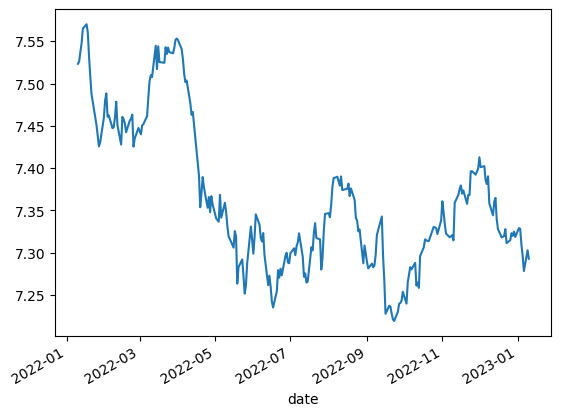

In [7]:
# Transformation 

InfyStockDF['ts_log'] = np.log(InfyStockDF['close'])

InfyStockDF['ts_sqrt'] = np.sqrt(InfyStockDF['close'])

InfyStockDF['ts_cbrt'] = np.cbrt(InfyStockDF['close'])

InfyStockDF['ts_log'].plot()


              close  close_diff    ts_log    ts_sqrt    ts_cbrt  \
date                                                              
2022-01-10  1850.75         NaN  7.523346  43.020344  12.277669   
2022-01-11  1855.60        4.85  7.525963  43.076676  12.288384   
2022-01-12  1877.45       21.85  7.537670  43.329551  12.336429   
2022-01-13  1896.80       19.35  7.547924  43.552267  12.378666   
2022-01-14  1929.35       32.55  7.564938  43.924367  12.449073   
...             ...         ...       ...        ...        ...   
2023-01-04  1494.80      -27.75  7.309748  38.662643  11.433899   
2023-01-05  1475.20      -19.60  7.296549  38.408332  11.383705   
2023-01-06  1448.50      -26.70  7.278284  38.059164  11.314608   
2023-01-09  1484.45       35.95  7.302800  38.528561  11.407449   
2023-01-10  1469.75      -14.70  7.292848  38.337319  11.369669   

            close_log_diff  
date                        
2022-01-10             NaN  
2022-01-11        0.002617  
2022-01-12  

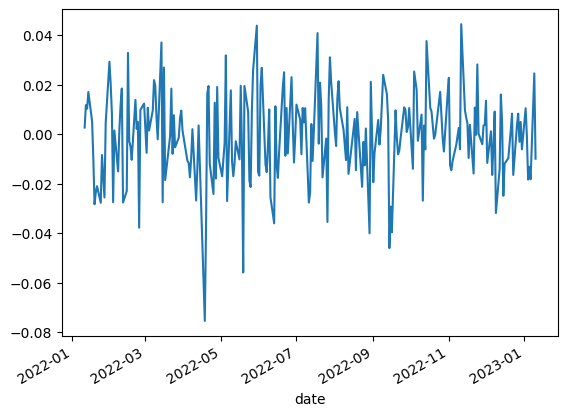

In [8]:
# Transformation (log) + differencing

InfyStockDF['close_log_diff'] = InfyStockDF['ts_log'] - InfyStockDF['ts_log'].shift(1)
InfyStockDF['close_log_diff'].plot()
print(InfyStockDF)

<AxesSubplot: xlabel='date'>

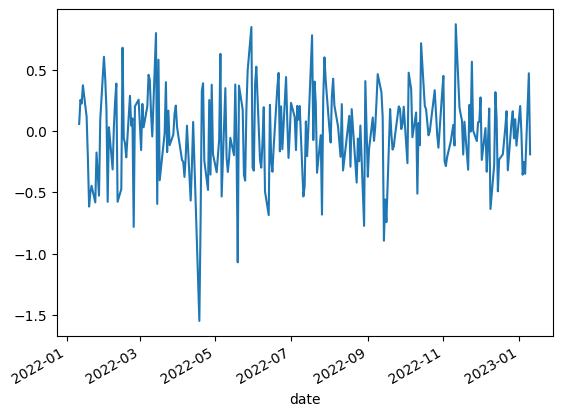

In [10]:
# Transformation (square root) + differencing

InfyStockDF['close_sqrt_diff'] = InfyStockDF['ts_sqrt'] - InfyStockDF['ts_sqrt'].shift(1)
InfyStockDF['close_sqrt_diff'].plot()

<AxesSubplot: xlabel='date'>

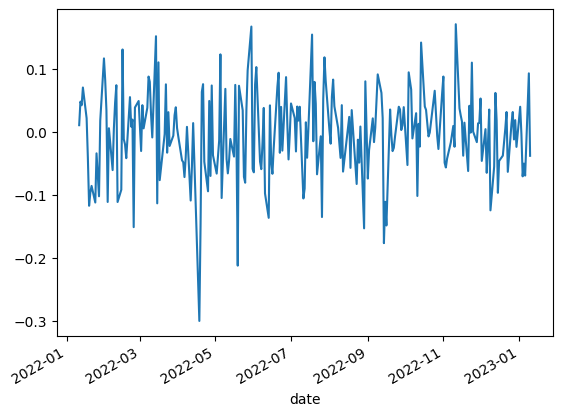

In [11]:
# Transformation (cuberoot) + differencing

InfyStockDF['close_cbrt_diff'] = InfyStockDF['ts_cbrt'] - InfyStockDF['ts_cbrt'].shift(1)
InfyStockDF['close_cbrt_diff'].plot()

<AxesSubplot: xlabel='date'>

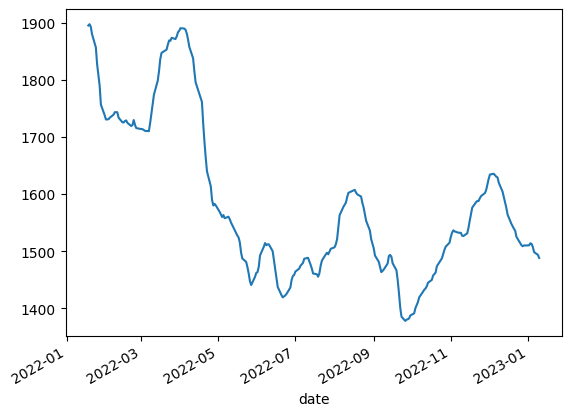

In [12]:
# rolling stats

InfyStockDF['MA7'] = InfyStockDF['close'].rolling(window = 7).mean()
InfyStockDF['MA7'].plot()

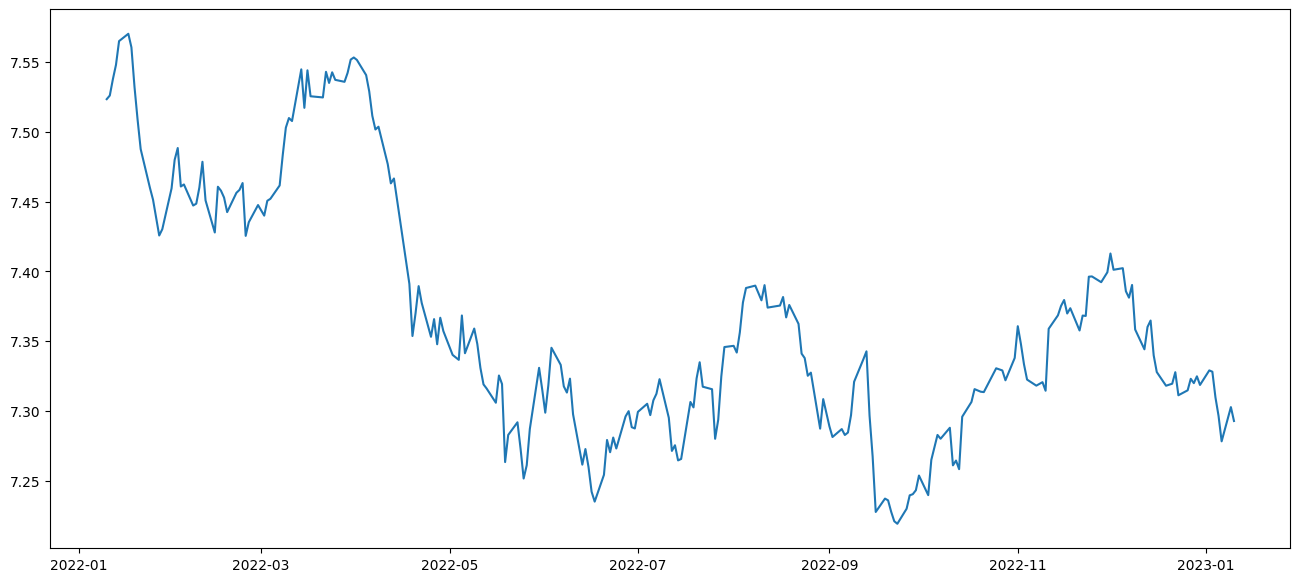

In [21]:
plt.figure(figsize=(16,7))
fig = plt.figure(1)

ts_log = np.log(InfyData)
plt.plot(ts_log)


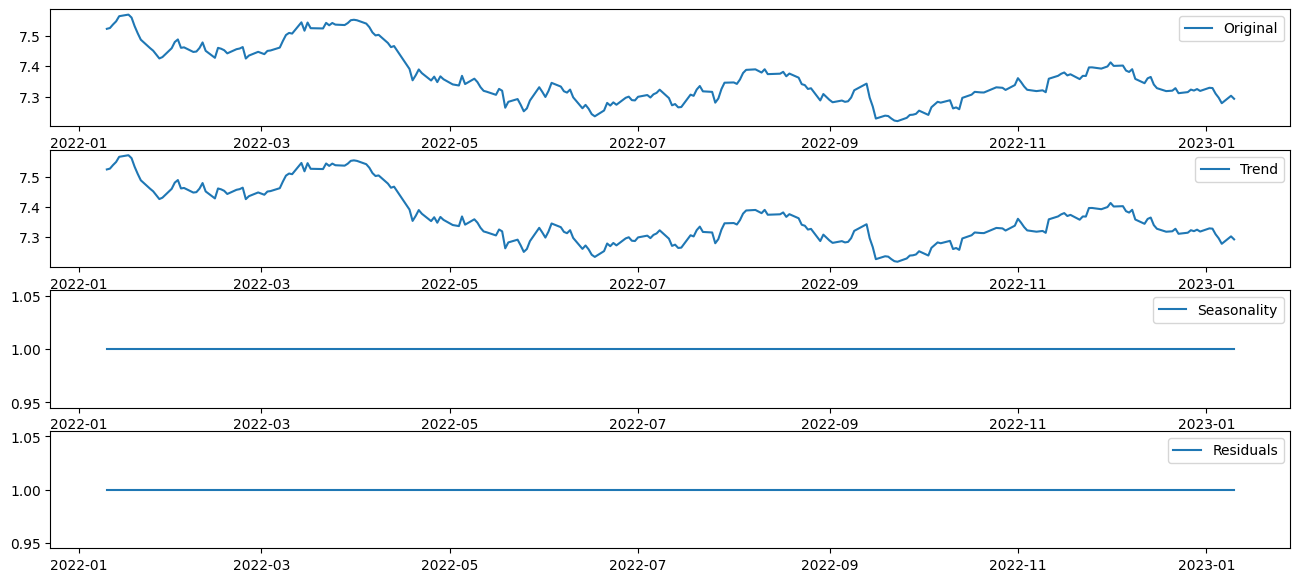

In [14]:
# Decomposition

plt.figure(figsize=(16,7))
fig = plt.figure(1)

decompose_result = seasonal_decompose(ts_log, period = 1, model = 'multiplicative')
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

In [15]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("ADF : ",dftest[0])
    print("P-Value : ", dftest[1]) # it should be < 0.05 else non stationary
    print("Num Of Lags : ", dftest[2])
    print("Observations used For ADF Regression:", dftest[3])
    print("Critical Values :")
#     print(type(dftest))
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)



date
2022-01-10         NaN
2022-01-11    0.002617
2022-01-12    0.011706
2022-01-13    0.010254
2022-01-14    0.017015
                ...   
2023-01-04   -0.018394
2023-01-05   -0.013199
2023-01-06   -0.018265
2023-01-09    0.024516
2023-01-10   -0.009952
Name: close, Length: 247, dtype: float64


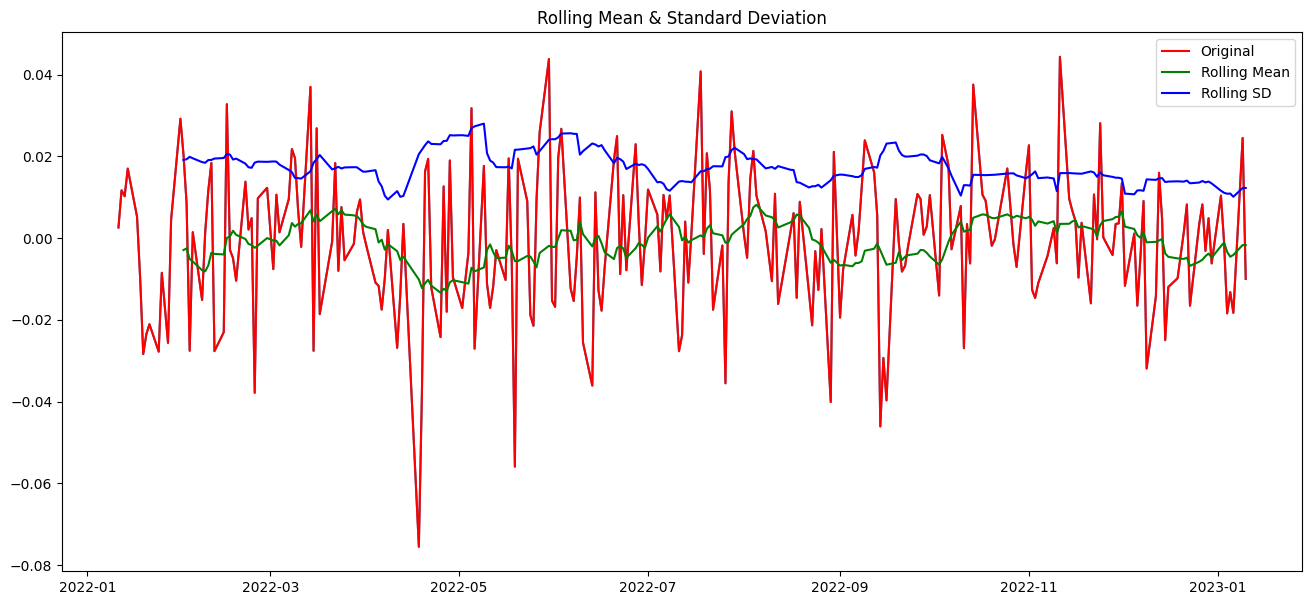

In [23]:
# differencing on ts_log

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
# print(ts_log_diff)
plt.plot(ts_log_diff)


# stationary check

rollingMean = ts_log_diff.rolling(15).mean()
rollingSD = ts_log_diff.rolling(15).std()

ori = plt.plot(ts_log_diff, color='red', label='Original')
mean = plt.plot(rollingMean, color='green', label='Rolling Mean')
std = plt.plot(rollingSD, color='blue', label = 'Rolling SD')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

# there is no trend in rolling mean and SD hence ts_log_diff is smoothened/stationary data

In [17]:
ts_log_diff = ts_log_diff.dropna()
adf_test(ts_log_diff)

ADF :  -14.771802579592615
P-Value :  2.3163064089804428e-27
Num Of Lags :  0
Observations used For ADF Regression: 245
Critical Values :
	 1% :  -3.4573260719088132
	 5% :  -2.873410402808354
	 10% :  -2.573095980841316


In [90]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags = 60)
lag_pacf = pacf(ts_log_diff, nlags = 60)

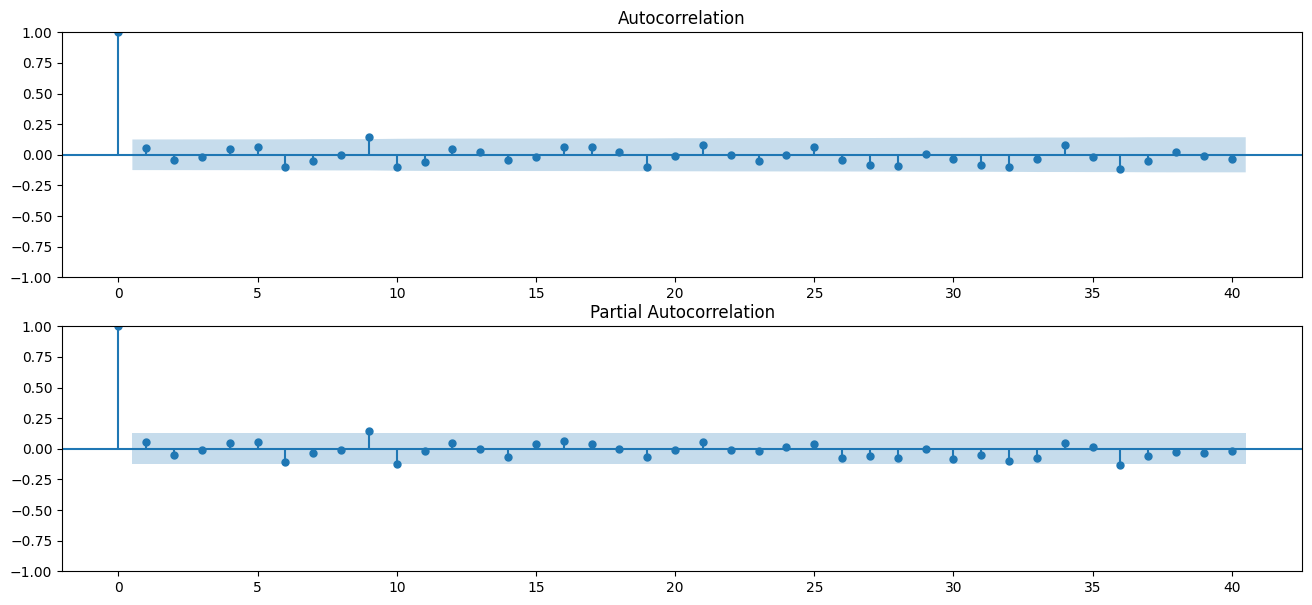

In [91]:
import statsmodels.api as sm

fig = plt.figure(figsize=(16, 7))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212) 
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40, ax=ax2)

date
2022-01-11    0.002617
2022-01-12    0.011706
2022-01-13    0.010254
2022-01-14    0.017015
2022-01-17    0.005247
                ...   
2023-01-04   -0.018394
2023-01-05   -0.013199
2023-01-06   -0.018265
2023-01-09    0.024516
2023-01-10   -0.009952
Name: close, Length: 246, dtype: float64


C:\Users\smrut\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smrut\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smrut\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\smrut\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starti

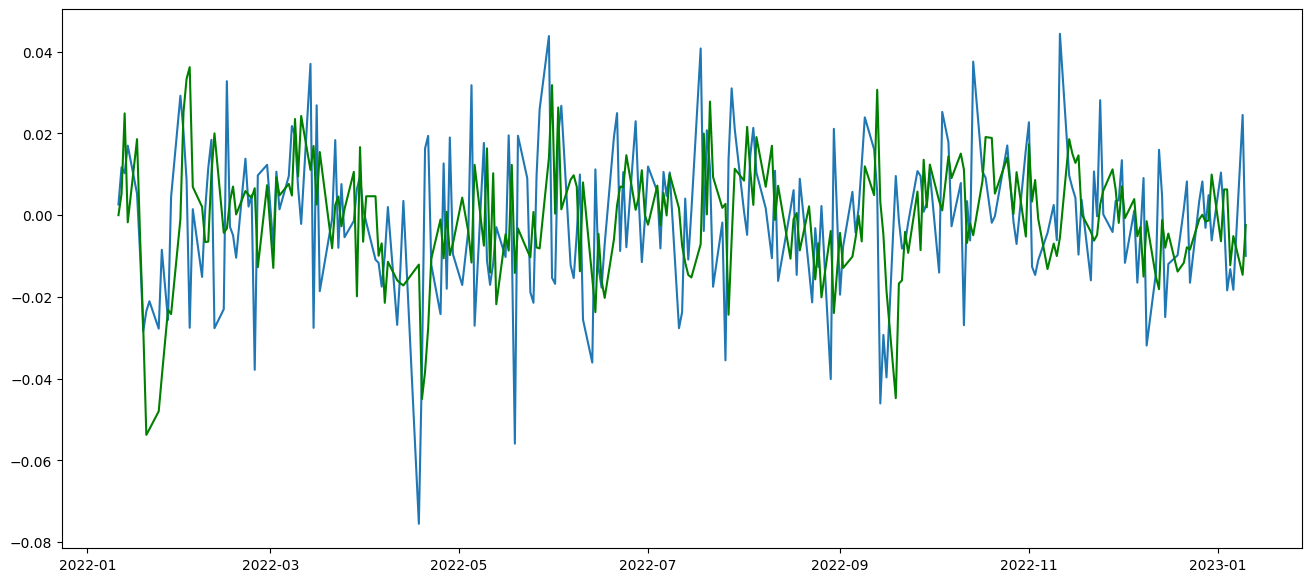

In [26]:
from statsmodels.tsa.arima.model import ARIMA

fig = plt.figure(figsize=(16, 7))
ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]
print(ts_log_diff)
InfyStockModel = ARIMA(ts_log_diff, order = (6,3,6))
results_ARIMA = InfyStockModel.fit()
plt.plot(ts_log_diff) # actual values
plt.plot(results_ARIMA.fittedvalues, color = 'green') # fitted estimated values

Text(0.5, 1.0, 'RMSE: 58.1062')

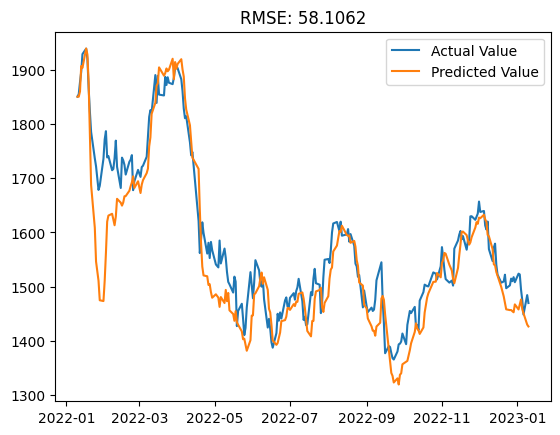

In [28]:
# Convert results to original values

Infy_stock_prediction = pd.Series(results_ARIMA.fittedvalues, copy = True)
# print(Infy_stock_prediction)
# Infy_stock_prediction.sort_index(inplace= True)
# print(Infy_stock_prediction.head())
Infy_stock_prediction_cumsum = Infy_stock_prediction.cumsum() # because we differenced to make it stationary
# Infy_stock_prediction
Infy_stock_prediction_cumsum_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
Infy_stock_prediction_cumsum_log = Infy_stock_prediction_cumsum_log.add(Infy_stock_prediction_cumsum, fill_value=0)
# Infy_stock_prediction_cumsum_log.head()
# print(len(Infy_stock_prediction_cumsum))
# print(len(Infy_stock_prediction_cumsum_log))

predicted_value = np.exp(Infy_stock_prediction_cumsum_log) # exponential : reverse of log
plt.plot(InfyData, label = 'Actual Value')
plt.plot(predicted_value, label = 'Predicted Value')
plt.legend()
plt.title('RMSE: %.4f'% np.sqrt(sum((predicted_value - InfyData)**2)/len(InfyData)))
# InfyData

In [94]:
# forecast stock value for next 10 days
pred = results_ARIMA.forecast(10)



C:\Users\smrut\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [95]:
# setting index of forecasted days to plot it. 
import datetime

start_date = datetime.date(2023, 1, 11)
end_date = datetime.date(2023, 12, 31)

delta = datetime.timedelta(days = 1)
holidays = ['2023-01-26', '2023-03-07', '2023-03-30', '2023-04-04', '2023-04-07', '2023-04-14', '2023-06-01', '2023-06-28', '2023-07-29', '2023-08-15', '2023-09-19', '2023-10-02', '2023-10-24', '2023-11-14', '2023-11-27', '2023-12-25']
cnt = len(pred)
workingDays = []
 
while(start_date <= end_date and cnt > 0):
    curDate = str(start_date)
    if not (curDate in holidays or start_date.weekday() >= 5):
        workingDays.append(start_date)
        cnt = cnt - 1
    start_date += delta

pred_df = pred.to_frame()
pred_df.index = workingDays
pred_df

,predicted_mean
2023-01-11,-0.003637
2023-01-12,0.002941
2023-01-13,0.001971
2023-01-16,-0.000230
2023-01-17,0.002495
2023-01-18,0.005494
2023-01-19,-0.001293
2023-01-20,0.012201
2023-01-23,0.000685
2023-01-24,0.008570


,close_with_diff,predicted_close,actual,diff_betw_actual_pred
2023-01-04,-0.018394,1494.800000,1494.800049,0.000
2023-01-05,-0.013199,1475.200000,1475.199951,0.000
2023-01-06,-0.018265,1448.500000,1448.500000,0.000
2023-01-09,0.024516,1484.450000,1484.449951,0.000
2023-01-10,-0.009952,1469.750000,1469.750000,0.000
2023-01-11,-0.003637,1464.413832,1471.250000,6.836
2023-01-12,0.002941,1468.727434,1480.599976,11.873
2023-01-13,0.001971,1471.624887,1503.650024,32.025
2023-01-16,-0.000230,1471.286616,1525.500000,54.213
2023-01-17,0.002495,1474.961413,1539.500000,64.539


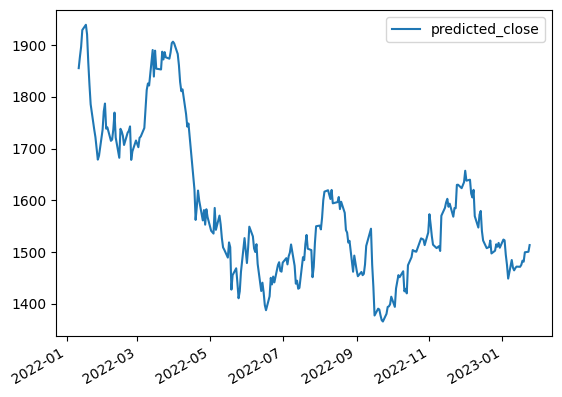

In [96]:
train = ts_log_diff.to_frame()

pred_df.index = pd.to_datetime(pred_df.index)
pred_df.rename(columns = {'predicted_mean':'close_with_diff'}, inplace = True)
train.rename(columns = {'close':'close_with_diff'}, inplace = True)
        
frames = [train['close_with_diff'], pred_df['close_with_diff']] # concat dfs
result = pd.concat(frames)
pred_with_diff = result.to_frame()

# pred_with_diff
# InfyStockDF
pred_with_diff['predicted_close'] = pred_with_diff['close_with_diff'].expanding(min_periods=0).sum() + InfyStockDF['ts_log'][0] # rev
pred_with_diff['predicted_close'] = np.exp(pred_with_diff['predicted_close'])
# pred_with_diff['predicted_close'].plot(legend = True)
# pred_with_diff['actual'].plot(legend = True)
pred_with_diff['actual'] = data1['Close']
pred_with_diff['diff_betw_actual_pred'] = (abs(pred_with_diff['predicted_close'] - pred_with_diff['actual'])).round(3)
pred_with_diff.tail(15)
pred_with_diff['predicted_close'].plot(legend = True)
# pred_with_diff['actual'].plot(legend = True)
pred_with_diff.tail(15)
# type(pred_with_diff.index)
# pred.index = 
# results_ARIMA.predict(0,245)
